In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [125]:
cdf = df[['ENGINESIZE', 'CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


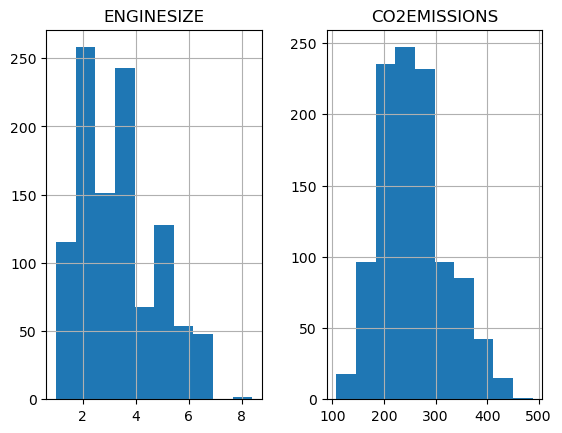

In [127]:
cdf.hist()
plt.show()

In [131]:
msk = np.random.rand(len(df)) < 0.9
train_data = cdf[msk]
test_data = cdf[~msk]

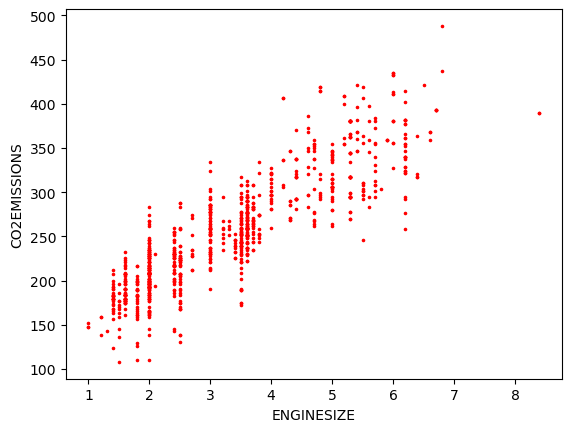

In [133]:
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS, color='red', s=2.5)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [137]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
train_data_x = np.asanyarray(train_data[['ENGINESIZE']])
train_data_y = np.asanyarray(train_data[['CO2EMISSIONS']])
regression.fit(train_data_x, train_data_y)

print('coef_', regression.coef_)
print('intercept', regression.intercept_)

coef_ [[39.46802181]]
intercept [124.66124397]


Text(0, 0.5, 'CO2EMISSIONS')

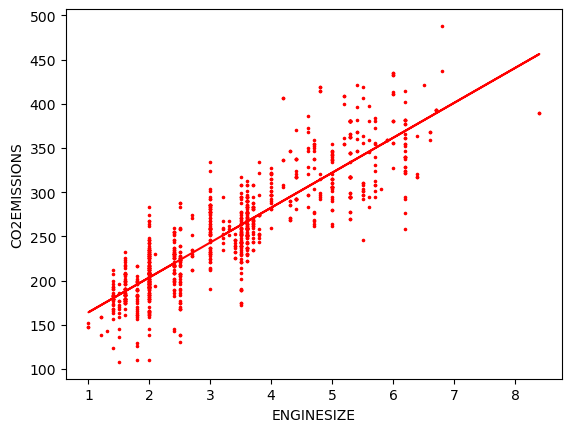

In [139]:
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS, color='red', s=2.5)
plt.plot(train_data_x, regression.coef_[0][0] * train_data_x + regression.intercept_[0], '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [141]:
from sklearn.metrics import r2_score

test_data_x = np.asanyarray(test_data[['ENGINESIZE']])
test_data_y = np.asanyarray(test_data[['CO2EMISSIONS']])
test_y_p = regression.predict(test_data_x)

print('Mean Absolute Error %.2f' % np.mean(np.absolute(test_data_y - test_y_p)))
print('Residaul sum of squares (MSE): %.2f' % np.mean(np.absolute(test_data_y - test_y_p) ** 2))
print('R2 score: %.2f' % r2_score(test_y_p, test_data_y))

Mean Absolute Error 20.36
Residaul sum of squares (MSE): 686.75
R2 score: 0.75
